Se comienza con los prototipos de las funciones a emplear

In [3]:
import numpy as np
import matplotlib.pyplot as plt



def mi_funcion_DFT( xx ):
    N = len(xx)
    X = np.zeros(N,dtype=np.complex128)
    for k in range(N):
        for n in range(N):
            X[k] += xx[n]*np.exp(-2j*np.pi*k*n/N)

    return X

def  mi_funcion_sen( vmax , dc , ff , ph, nn , fs ):
    
    t_start = ph/ ( ff * 2 * np.pi ) # Seg
    t_sim = nn / fs
    t = np.arange( start = t_start,stop = t_sim + t_start, step = 1 / fs  ) #Seg
    
    x = vmax * np.sin( 2 * np.pi * ff* t) + dc #Volts
    
    return t, x

Prueba de la función dft con una señal senoidal de 100 Hz y amplitud 4V

Text(0, 0.5, '|X[n]|')

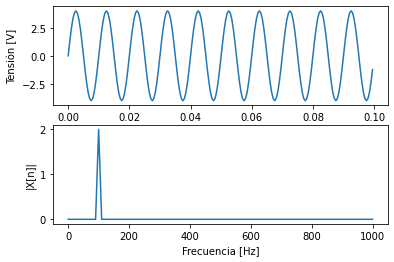

In [17]:
fs = 2000 #Hz
N = 200 # para que delta_f sea 1 (elección de diseño)
df = fs/N
fx = 100 #Hz
ax = 4 #V
offset = 0
fase = 0
XX = np.zeros(N,dtype=np.complex128)
tt, s1 = mi_funcion_sen( ax, offset, fx, fase, N, fs)



plt.figure(1)
plt.subplot(2,1,1)
plt.plot(tt,s1)
plt.xlabel('Segundos [s]')
plt.ylabel('Tensión [V]')

#Normalizo los resultados de la DFT 
XX = mi_funcion_DFT( s1 )/N
ff = np.linspace(0, (N-1)*df, N)




plt.subplot(2,1,2)
bfrec = ff <= fs/2
plt.plot( ff[bfrec],np.abs(XX[bfrec]))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X[n]|')


Se nota que la energía expresada al nonormalizar la dft es igual a la mitad del pico de la señal en el dominio del tiempo

Se repite la experiencia para una una señal de 200Hz

Text(0, 0.5, '|X[n]|')

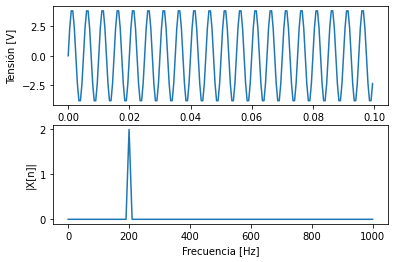

In [18]:

fx = 200 #Hz
tt, s2 = mi_funcion_sen( ax, offset, fx, fase, N, fs)
XX = mi_funcion_DFT( s2 )/N

plt.figure(2)
plt.subplot(2,1,1)
plt.plot(tt,s2)
plt.xlabel('Segundos [s]')
plt.ylabel('Tensión [V]')
plt.subplot(2,1,2)
bfrec = ff <= fs/2
plt.plot( ff[bfrec],np.abs(XX[bfrec]))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X[n]|')

Se repite la experiencia con la suma de dos señales (100Hz y 200Hz)

Text(0, 0.5, '|X[n]|')

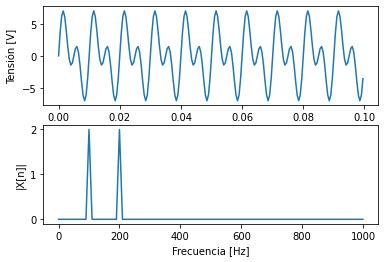

In [19]:
s3 = s1 + s2

XX = mi_funcion_DFT( s3 )/N

plt.figure(3)
plt.subplot(2,1,1)
plt.plot(tt,s3)
plt.xlabel('Segundos [s]')
plt.ylabel('Tensión [V]')
plt.subplot(2,1,2)
bfrec = ff <= fs/2
plt.plot( ff[bfrec],np.abs(XX[bfrec]))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X[n]|')

Por último se repite la experiencia superando el límite de nyquist

Text(0, 0.5, '|X[n]|')

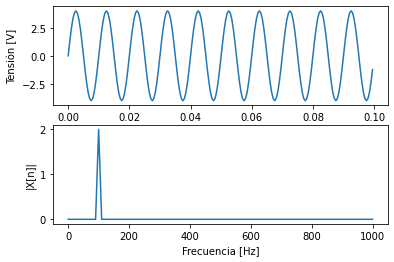

In [21]:
fx = 2100 #Hz
tt, s4 = mi_funcion_sen( ax, offset, fx, fase, N, fs)
XX = mi_funcion_DFT( s4 )/N

plt.figure(4)
plt.subplot(2,1,1)
plt.plot(tt,s4)
plt.xlabel('Segundos [s]')
plt.ylabel('Tensión [V]')
plt.subplot(2,1,2)
bfrec = ff <= fs/2
plt.plot( ff[bfrec],np.abs(XX[bfrec]))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X[n]|')

Se puede apreciar como se produce el efecto de Aliasing